# Importing Essentials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Describing the Dataset

In [2]:
df = pd.read_csv("FraudTrain.csv", index_col=0)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Description of the columns in the Dataset:
+ trans_date_trans_time - Transaction DateTime
+ cc_num - Credit Card Number of Customer
+ merchant - Merchant Name
+ category - Category of Merchant
+ amt - Amount of Transaction
+ first - First Name of Credit Card Holder
+ last - Last Name of Credit Card Holder
+ gender - Gender of Credit Card Holder
+ street - Street Address of Credit Card Holder
+ city - City of Credit Card Holder
+ state - State of Credit Card Holder
+ zip - Zip of Credit Card Holder
+ lat - Latitude Location of Credit Card Holder
+ long - Longitude Location of Credit Card Holder
+ city_pop - Credit Card Holder's City Population
+ job - Job of Credit Card Holder
+ dob - Date of Birth of Credit Card Holder
+ trans_num - Transaction Number
+ unix_time - UNIX Time of transaction
+ merch_lat - Latitude Location of Merchant
+ merch_long - Longitude Location of Merchant
+ is_fraud - Fraud Flag

<h2> There is no null value issues in the dataset </h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

# Exploratory Data Analysis

## What's the time?

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [6]:
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [7]:
fraud_data = df[df['is_fraud'] == 1].copy()

fraud_data['hour'] = fraud_data['trans_date_trans_time'].dt.hour

fraud_counts_by_hour = fraud_data.groupby('hour').size()


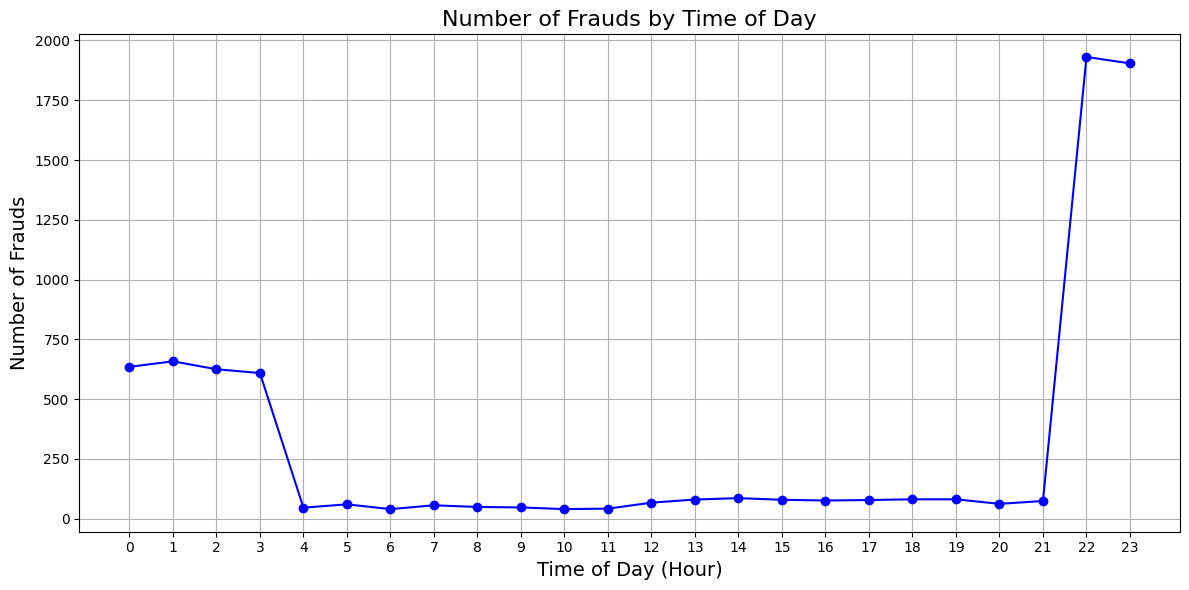

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_counts_by_hour.index, fraud_counts_by_hour.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Frauds by Time of Day', fontsize=16)
plt.xlabel('Time of Day (Hour)', fontsize=14)
plt.ylabel('Number of Frauds', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### According to the graph, most frauds take place between 9 PM and 10 PM. Number of frauds is also high between 12 AM to 4 AM, but slows down drastically after that. 

### In the daytime, number of frauds is slightly higher from 1 PM to 5 PM.

## Our Weekend, Thier Weekday

In [9]:
fraud_data = df[df['is_fraud'] == 1].copy()  

fraud_data['day_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek

fraud_counts_by_day = fraud_data.groupby('day_of_week').size()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_counts_by_day.index = fraud_counts_by_day.index.map(lambda x: day_names[x])

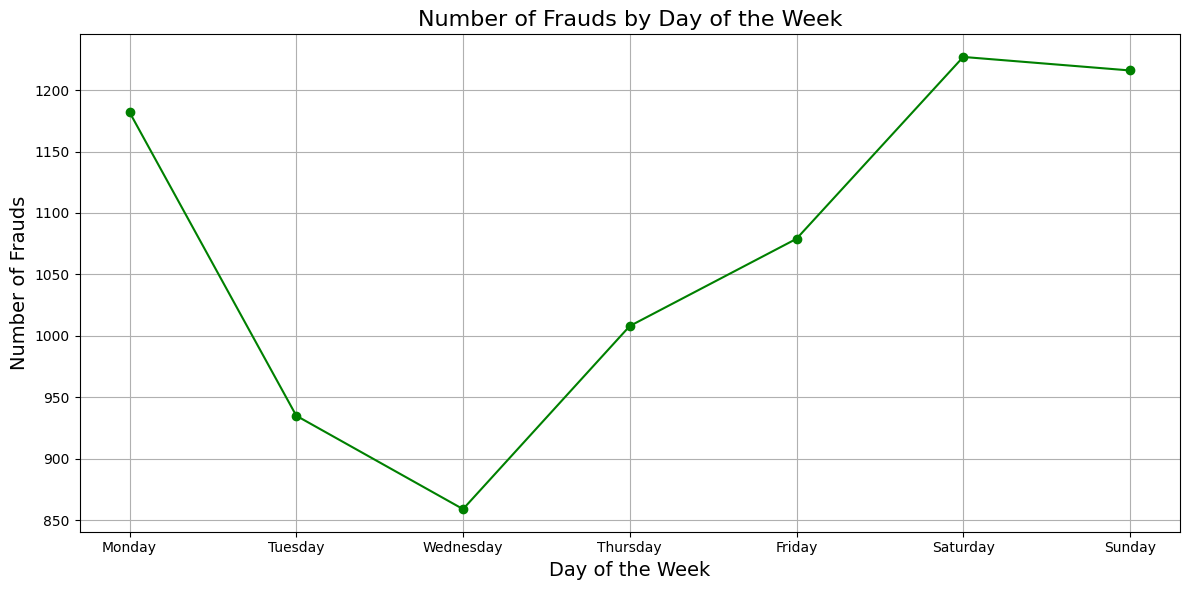

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_counts_by_day.index, fraud_counts_by_day.values, marker='o', linestyle='-', color='green')
plt.title('Number of Frauds by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Frauds', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### According to the graph, most frauds take place on weekends. 

### As in for the week days, Mondays face the most frauds. 